# Hierarchical Risk Parity (HRP)

## 1. Covariance and Correlation

For $N$ assets with return vector $\mathbf{r}$, the covariance matrix is:
$$
\Sigma \in \mathbb{R}^{N \times N}.
$$
The correlation matrix is defined as:
$$
\rho_{ij} = \frac{\Sigma_{ij}}{\sqrt{\Sigma_{ii} \Sigma_{jj}}}, \quad i,j=1,\ldots,N.
$$

## 2. Conversion from Correlation to Distance

Convert correlations to a distance metric:
$$
D_{ij} = \sqrt{\frac{1 - \rho_{ij}}{2}}, \quad i,j = 1,\ldots,N.
$$

## 3. Distance of Distances $\tilde{D}$

Let the distance profile of asset $i$ be:
$$
\mathbf{d}_i = (D_{i1}, D_{i2}, \dots, D_{iN}).
$$
The second-level distance is:
$$
\tilde{D}_{ij} = \|\mathbf{d}_i - \mathbf{d}_j\|_2 = \sqrt{\sum_{k=1}^N \bigl(D_{ik} - D_{jk}\bigr)^2}.
$$

## 4. Hierarchical Clustering

Use $\tilde{D}$ in a hierarchical clustering algorithm (e.g., Ward’s method) to generate a dendrogram and obtain an ordering $\pi$ that quasi-diagonalizes $\Sigma$.

## 5. Recursive Bisection for Weight Allocation

### Inverse-Variance Allocation

For a cluster $C$, assign preliminary weights:
$$
w_i \propto \frac{1}{\Sigma_{ii}}, \quad i \in C.
$$

### Splitting Clusters

Given two clusters $C_1$ and $C_2$ with aggregate variances:
$$
\sigma_{C}^2 = \mathbf{w}_C^\top \Sigma_C \mathbf{w}_C,
$$
assign weights as:
$$
\alpha_{C_1} = 1 - \frac{\sigma_{C_1}^2}{\sigma_{C_1}^2 + \sigma_{C_2}^2}, \quad \alpha_{C_2} = 1 - \frac{\sigma_{C_2}^2}{\sigma_{C_1}^2 + \sigma_{C_2}^2}.
$$
The allocation is applied recursively until each cluster reduces to a single asset; the final asset weight $w_i$ is the product of the splits along its dendrogram path.



In [102]:
import matplotlib.pyplot as plt



In [103]:
import yfinance as yf
import pandas as pd
import numpy as np
# Define the sectors and corresponding tickers. Adjust these lists as desired.
sectors = {
    "Technology": ["AAPL", "MSFT", "GOOGL", "AMZN", "NVDA", "ADBE"],
    "Healthcare": ["JNJ", "PFE", "MRK", "UNH", "ABT", "BMY"],
    "Financial": ["JPM", "BAC", "WFC", "C", "GS", "MS"],
    "Industrials": ["BA", "GE", "CAT", "HON", "UPS", "LMT"],
    "Energy": ["XOM", "CVX", "COP", "SLB", "OXY", "PSX"]
}
all_values = np.concatenate(list(sectors.values()))
# Set a time period for the historical price data.
# You can change the period to '6mo', '1y', '5y', etc., or specify start and end dates.
period = "20y"

# Prepare a dictionary to store data for each sector.
sector_data = {}

# Iterate over each sector and download daily closing prices.
for sector, tickers in sectors.items():
    # Download data: the 'Close' column holds the daily close prices
    data = yf.download(tickers, period=period)["Close"]
    sector_data[sector] = data
    print(f"Data for {sector} sector:")
    print(data.head(), "\n")  # Print the first few rows for preview

# If needed, you can combine the data for further analysis.
# For example, concatenating all sectors into one DataFrame:
all_stocks = pd.concat(sector_data, axis=1)
print("Combined data sample:")
print(all_stocks.head())



[*********************100%***********************]  6 of 6 completed


Data for Technology sector:
Ticker          AAPL       ADBE    AMZN     GOOGL       MSFT      NVDA
Date                                                                  
2005-04-11  1.261523  33.400002  1.7300  4.812577  17.346678  0.175682
2005-04-12  1.283792  33.450001  1.7315  4.830759  17.589817  0.177822
2005-04-13  1.235041  32.535000  1.7150  4.805105  17.395300  0.170409
2005-04-14  1.121287  31.740000  1.6985  4.768244  17.256359  0.169034
2005-04-15  1.063809  30.330000  1.6510  4.607602  16.992378  0.163150 



[*********************100%***********************]  6 of 6 completed


Data for Healthcare sector:
Ticker            ABT        BMY        JNJ        MRK        PFE        UNH
Date                                                                        
2005-04-11  14.414979  11.840573  38.836773  15.467854  11.057025  38.554607
2005-04-12  14.460258  11.949115  38.695839  15.780573  11.232532  38.550652
2005-04-13  14.586272  12.166201  38.667656  16.111959  11.399686  38.058846
2005-04-14  14.662172  12.185078  39.039730  16.233316  11.470727  37.245800
2005-04-15  15.141908  12.246425  39.124298  16.242651  11.579374  36.991947 



[*********************100%***********************]  6 of 6 completed


Data for Financial sector:
Ticker            BAC           C         GS        JPM         MS        WFC
Date                                                                         
2005-04-11  28.840103  291.233612  82.326836  20.349571  29.549459  17.220640
2005-04-12  29.186329  296.597290  82.084473  20.596445  29.772415  17.401453
2005-04-13  28.923441  292.510712  80.799126  20.320183  29.034670  17.283783
2005-04-14  28.647745  289.892761  79.682793  20.096819  28.597475  17.177586
2005-04-15  28.391277  292.127533  78.213814  19.943993  28.138428  16.970938 



[*********************100%***********************]  6 of 6 completed


Data for Industrials sector:
Ticker             BA        CAT          GE        HON        LMT        UPS
Date                                                                         
2005-04-11  41.775028  27.210945  104.033966  22.707727  35.287773  39.298016
2005-04-12  41.106903  27.579100  104.818199  22.750250  35.208405  39.652809
2005-04-13  41.261635  26.737154  103.511185  22.501179  35.117691  38.768600
2005-04-14  40.902958  25.771469  103.104614  22.075951  34.584827  38.162750
2005-04-15  40.087139  25.186039  103.830688  21.662855  33.621162  37.524155 



[*********************100%***********************]  6 of 6 completed

Data for Energy sector:
Ticker            COP        CVX        OXY  PSX        SLB        XOM
Date                                                                  
2005-04-11  21.756329  26.651833  20.760637  NaN  23.394072  30.916061
2005-04-12  21.352077  26.122259  20.446815  NaN  23.111612  30.987858
2005-04-13  20.764444  25.433361  19.565271  NaN  22.928852  30.331488
2005-04-14  20.679651  25.199028  19.551014  NaN  22.928852  30.126366
2005-04-15  19.733122  24.467947  18.686571  NaN  22.237656  28.813622 

Combined data sample:
           Technology                                                    \
Ticker           AAPL       ADBE    AMZN     GOOGL       MSFT      NVDA   
Date                                                                      
2005-04-11   1.261523  33.400002  1.7300  4.812577  17.346678  0.175682   
2005-04-12   1.283792  33.450001  1.7315  4.830759  17.589817  0.177822   
2005-04-13   1.235041  32.535000  1.7150  4.805105  17.395300  0.170409   
2005-

In [104]:


test_data = all_stocks[all_stocks.index >= '2024-10-01']
all_stocks = all_stocks[all_stocks.index < '2024-10-01']



In [105]:
all_stocks = all_stocks.pct_change().dropna()
test_data = test_data.pct_change().dropna()

In [106]:
cov, corr = all_stocks.cov(), all_stocks.corr()

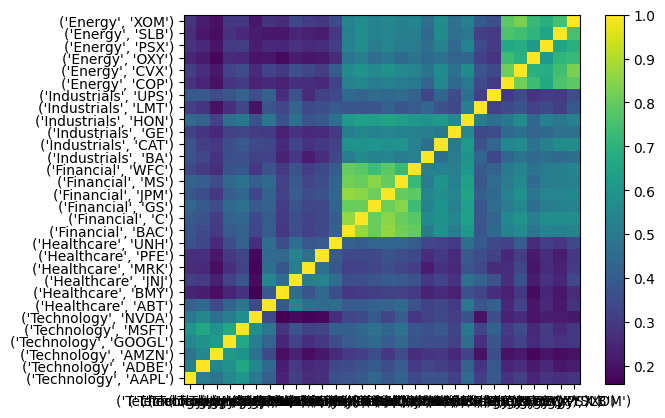

In [107]:
plt.figure()
plt.pcolor(corr)
plt.colorbar()
plt.yticks(np.arange(0.5, corr.shape[0] + 0.5), corr.columns)
plt.xticks(np.arange(0.5, corr.shape[0] + 0.5), corr.columns)


plt.show()

In [108]:
import numpy as np
import scipy.cluster.hierarchy as sch

def distance_corr(
        corr_matrix: np.ndarray
) -> np.ndarray:
    """
    Compute the distance matrix based on correlation.

    :param corr_matrix: Correlation matrix.
    :type corr_matrix: np.ndarray
    :return: Distance matrix based on correlation.
    :rtype: np.ndarray
    """
    distance_matrix = ((1 - corr_matrix) / 2.0) ** 0.5
    return distance_matrix



from sklearn.metrics import pairwise_distances

def distance_of_distances_df(corr_matrix: np.ndarray) -> pd.DataFrame:
    """
    Compute the 'distance of distances' matrix \tilde{D} from the distance DataFrame.
    The Euclidean distance is computed between the rows (or columns) of distance_df.

    :param distance_df: DataFrame containing the original distance matrix D.
    :return: DataFrame containing the second-level distance matrix \tilde{D},
             with index and columns matching those of distance_df.
    """
    # Compute the pairwise Euclidean distances using the underlying numpy array.
    distance_df = distance_corr(corr_matrix)
    d_values = pairwise_distances(distance_df.values, metric='euclidean')

    # Wrap the output back into a DataFrame
    d_tilde_df = pd.DataFrame(d_values, index=distance_df.index, columns=distance_df.index)
    return d_tilde_df



distance = distance_of_distances_df(corr)
link = sch.linkage(distance, 'single')

<ipython-input-108-90baf43fd19f>:42: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  link = sch.linkage(distance, 'single')


In [109]:
def quasi_diagonal(linkage_matrix: np.ndarray) -> list:
    """
    Return a sorted list of original items to reshape the correlation matrix.

    :param linkage_matrix: Linkage matrix obtained from hierarchical clustering.
    :type linkage_matrix: np.ndarray
    :return: Sorted list of original items.
    :rtype: list
    """
    linkage_matrix = linkage_matrix.astype(int)
    sorted_items = pd.Series([linkage_matrix[-1, 0], linkage_matrix[-1, 1]])
    num_items = linkage_matrix[-1, 3]

    while sorted_items.max() >= num_items:
        print(sorted_items)
        sorted_items.index = range(0, sorted_items.shape[0] * 2, 2)
        dataframe = sorted_items[sorted_items >= num_items]
        print(dataframe)
        i = dataframe.index
        j = dataframe.values - num_items
        sorted_items[i] = linkage_matrix[j, 0]
        dataframe = pd.Series(linkage_matrix[j, 1], index=i + 1)

        sorted_items = sorted_items._append(dataframe)
        sorted_items = sorted_items.sort_index()
        sorted_items.index = range(sorted_items.shape[0])
        print(sorted_items)
    print(sorted_items)
    return sorted_items.tolist()

In [110]:
sortIx = quasi_diagonal(link)


0    55
1    57
dtype: int64
0    55
2    57
dtype: int64
0    40
1    54
2    47
3    56
dtype: int64
0    40
1    54
2    47
3    56
dtype: int64
0    40
2    54
4    47
6    56
dtype: int64
0    27
1    38
2    37
3    50
4     2
5    44
6    23
7    53
dtype: int64
0    27
1    38
2    37
3    50
4     2
5    44
6    23
7    53
dtype: int64
2     38
4     37
6     50
10    44
14    53
dtype: int64
0     27
1     26
2     36
3     17
4     35
5     43
6     45
7      2
8      5
9     42
10    23
11    22
12    52
dtype: int64
0     27
1     26
2     36
3     17
4     35
5     43
6     45
7      2
8      5
9     42
10    23
11    22
12    52
dtype: int64
4     36
8     35
10    43
12    45
18    42
24    52
dtype: int64
0     27
1     26
2     28
3     34
4     17
5     31
6     32
7     19
8     21
9     18
10    20
11     2
12     5
13     0
14    41
15    23
16    22
17    11
18    51
dtype: int64
0     27
1     26
2     28
3     34
4     17
5     31
6     32
7     19
8     21
9  

In [111]:
sortIx = corr.index[sortIx].tolist()  # recover labels
dataframe = corr.loc[sortIx, sortIx]

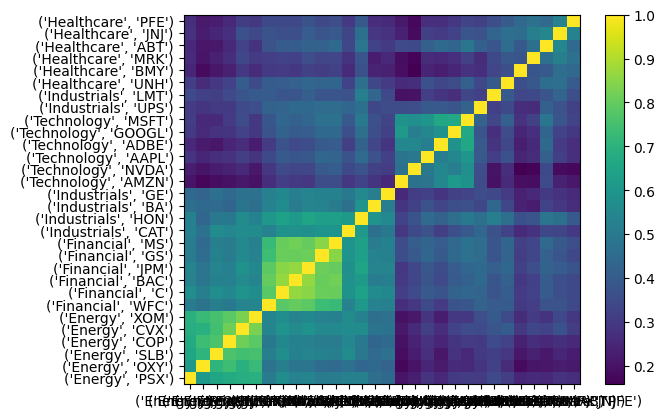

In [112]:
plt.figure()
plt.pcolor(dataframe)
plt.colorbar()
plt.yticks(np.arange(0.5, dataframe.shape[0] + 0.5), dataframe.columns)
plt.xticks(np.arange(0.5, dataframe.shape[0] + 0.5), dataframe.columns)


plt.show()

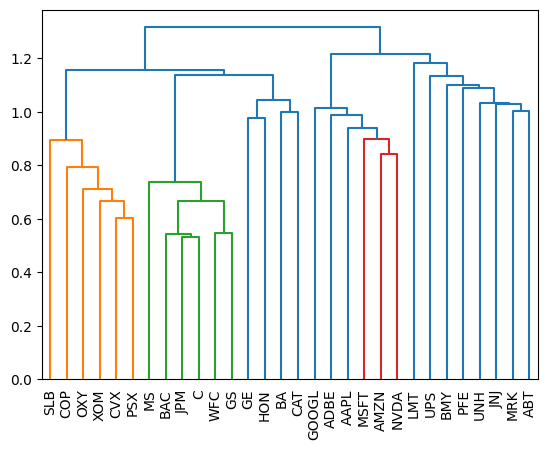

In [113]:
import matplotlib.pyplot as mpl
def llf(id):
    for i in range(30):
        if i == id:
            return all_values[i]


sch.dendrogram(link, leaf_label_func=llf, leaf_rotation=90)
mpl.show()

In [114]:
def inverse_variance_weights(covariance_matrix: pd.DataFrame) -> np.ndarray:
    """
    Compute the inverse-variance portfolio weights.

    :param covariance_matrix: Covariance matrix of asset returns.
    :type covariance_matrix: pd.DataFrame
    :return: Array of portfolio weights.
    :rtype: np.ndarray
    """
    inv_var_weights = 1.0 / np.diag(covariance_matrix)
    inv_var_weights /= inv_var_weights.sum()
    return inv_var_weights


def cluster_variance(covariance_matrix: pd.DataFrame, clustered_items: list) -> float:
    """
    Compute the variance of a cluster.

    :param covariance_matrix: Covariance matrix of asset returns.
    :type covariance_matrix: pd.DataFrame
    :param clustered_items: List of indices of assets in the cluster.
    :type clustered_items: list
    :return: Variance of the cluster.
    :rtype: float
    """
    cov_slice = covariance_matrix.loc[clustered_items, clustered_items]
    weights = inverse_variance_weights(cov_slice).reshape(-1, 1)
    cluster_variance = np.dot(np.dot(weights.T, cov_slice), weights)[0, 0]
    return cluster_variance

def recursive_bisection(covariance_matrix: pd.DataFrame, sorted_items: list) -> pd.Series:
    """
    Compute the Hierarchical Risk Parity (HRP) weights.

    :param covariance_matrix: Covariance matrix of asset returns.
    :type covariance_matrix: pd.DataFrame
    :param sorted_items: Sorted list of original items.
    :type sorted_items: list
    :return: DataFrame of asset weights.
    :rtype: pd.Series
    """
    weights = pd.Series(1, index=sorted_items)
    clustered_items = [sorted_items]

    while len(clustered_items) > 0:
        clustered_items = [
            i[j:k] for i in clustered_items for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1
        ]

        for i in range(0, len(clustered_items), 2):
            clustered_items_0 = clustered_items[i]

            clustered_items_1 = clustered_items[i + 1]

            cluster_variance_0 = cluster_variance(covariance_matrix, clustered_items_0)
            cluster_variance_1 = cluster_variance(covariance_matrix, clustered_items_1)
            alpha = 1 - cluster_variance_0 / (cluster_variance_0 + cluster_variance_1)
            weights[clustered_items_0] *= alpha
            weights[clustered_items_1] *= 1 - alpha

    return weights

In [115]:
weights = recursive_bisection(cov, sortIx)

<ipython-input-114-f3add4fc8d1f>:58: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.30565785 0.30565785 0.30565785 0.30565785 0.30565785 0.30565785
 0.30565785 0.30565785 0.30565785 0.30565785 0.30565785 0.30565785
 0.30565785 0.30565785 0.30565785]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  weights[clustered_items_0] *= alpha


In [116]:
weights

,0
"(Energy, PSX)",0.027024
"(Energy, OXY)",0.009304
"(Energy, SLB)",0.013372
"(Energy, COP)",0.013090
"(Energy, CVX)",0.021577
"(Energy, XOM)",0.028565
"(Financial, WFC)",0.022881
"(Financial, C)",0.014453
"(Financial, BAC)",0.015511
"(Financial, JPM)",0.021471


In [117]:
import numpy as np
import pandas as pd

import cvxpy as cp

def min_variance_portfolio_long_only(cov_matrix: pd.DataFrame) -> pd.Series:
    """
    Computes the minimum-variance portfolio weights under long-only constraints
    (i.e., 0 <= w_i <= 1) for the given covariance matrix using quadratic programming.

    Parameters:
      cov_matrix (pd.DataFrame): Covariance matrix with asset names as index and columns.

    Returns:
      pd.Series: Minimum variance portfolio weights indexed by asset names.
    """
    n = cov_matrix.shape[0]
    Sigma = cov_matrix.values

    # Define the optimization variable, a vector of weights for n assets.
    w = cp.Variable(n)

    # Define the objective: minimize portfolio variance w^T Sigma w
    objective = cp.Minimize(cp.quad_form(w, Sigma))

    # Define constraints:
    # 1. Fully invested portfolio: sum(w) == 1
    # 2. No short selling: w >= 0 (weights must be non-negative)
    constraints = [cp.sum(w) == 1, w >= 0]

    # Set up and solve the problem
    prob = cp.Problem(objective, constraints)
    prob.solve()

    # Return the optimal weights as a pandas Series
    return pd.Series(w.value, index=cov_matrix.index, name='MinVarianceWeights')




# Compute the minimum variance portfolio
min_var_weights = min_variance_portfolio_long_only(cov)
print("Minimum Variance Portfolio Weights:")
print(min_var_weights)


Minimum Variance Portfolio Weights:
             Ticker
Technology   AAPL      1.508018e-02
             ADBE      3.397325e-19
             AMZN      4.451236e-02
             GOOGL     2.908099e-02
             MSFT     -1.383635e-19
             NVDA      3.389968e-18
Healthcare   ABT      -2.632349e-18
             BMY       6.935947e-02
             JNJ       3.121718e-01
             MRK       1.401608e-01
             PFE       6.445129e-02
             UNH       2.679713e-03
Financial    BAC       1.903964e-18
             C         2.133169e-18
             GS        1.088262e-18
             JPM       8.979803e-19
             MS        1.570000e-18
             WFC       9.468561e-19
Industrials  BA        1.927529e-18
             CAT       7.126100e-19
             GE        1.499037e-18
             HON      -4.211035e-19
             LMT       1.587657e-01
             UPS       1.015597e-01
Energy       COP       2.748341e-18
             CVX       6.390946e-19
        

<Axes: >

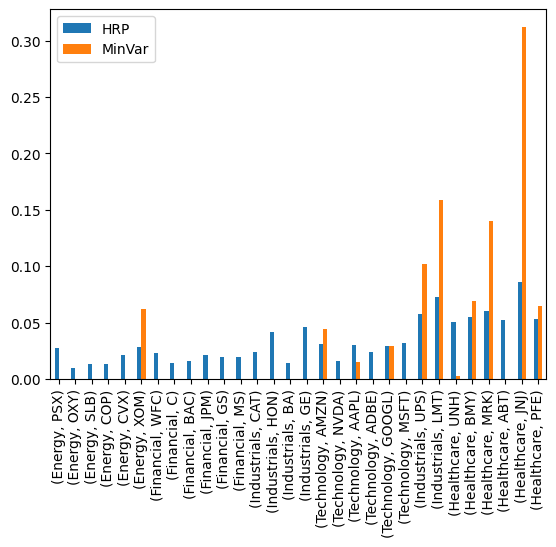

In [118]:
combine = pd.concat([weights, min_var_weights], axis=1)
combine.columns = ['HRP', 'MinVar']
combine.plot.bar()